In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catcat/test/cat_s/cat_585.jpg
/kaggle/input/catcat/test/cat_s/cat_525.jpg
/kaggle/input/catcat/test/cat_s/cat_306.jpg
/kaggle/input/catcat/test/cat_s/cat_430.jpg
/kaggle/input/catcat/test/cat_s/cat_551.jpg
/kaggle/input/catcat/test/cat_s/cat_332.jpg
/kaggle/input/catcat/test/cat_s/cat_156.jpg
/kaggle/input/catcat/test/cat_s/cat_358.jpg
/kaggle/input/catcat/test/cat_s/cat_417.jpg
/kaggle/input/catcat/test/cat_s/cat_255.jpg
/kaggle/input/catcat/test/cat_s/cat_234.jpg
/kaggle/input/catcat/test/cat_s/cat_575.jpg
/kaggle/input/catcat/test/cat_s/cat_1.jpg
/kaggle/input/catcat/test/cat_s/cat_504.jpg
/kaggle/input/catcat/test/cat_s/cat_496.jpg
/kaggle/input/catcat/test/cat_s/cat_395.jpg
/kaggle/input/catcat/test/cat_s/cat_520.jpg
/kaggle/input/catcat/test/cat_s/cat_18.jpg
/kaggle/input/catcat/test/cat_s/cat_5.jpg
/kaggle/input/catcat/test/cat_s/cat_375.jpg
/kaggle/input/catcat/test/cat_s/cat_384.jpg
/kaggle/input/catcat/test/cat_s/cat_468.jpg
/kaggle/input/catcat/test/cat_s/cat_3

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

2026-01-21 06:14:05.663364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768976045.943162      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768976046.039866      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768976046.717141      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768976046.717190      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768976046.717194      17 computation_placer.cc:177] computation placer alr

In [3]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

2026-01-21 06:14:28.235160: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [5]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/catcat/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/catcat/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 555 files belonging to 2 classes.
Found 138 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 110s 6s/step - accuracy: 0.5554 - loss: 0.6832 - val_accuracy: 0.6522 - val_loss: 0.5922
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.8439 - loss: 0.4376 - val_accuracy: 0.7826 - val_loss: 0.4974
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.9377 - loss: 0.2892 - val_accuracy: 0.7899 - val_loss: 0.4598
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step - accuracy: 0.9493 - loss: 0.2237 - val_accuracy: 0.7899 - val_loss: 0.4202
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step - accuracy: 0.9752 - loss: 0.1727 - val_accuracy: 0.7826 - val_loss: 0.4326
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 106s 6s/step - accuracy: 0.9802 - loss: 0.1354 - val_accuracy: 0.8188 - val_loss: 0.3840
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.9924 - loss: 0.0983 - val_accuracy: 0.7826 - val_loss: 0.3936
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step - accuracy: 0.9942 - loss: 0.0729 - val_accuracy: 0.7971 - v

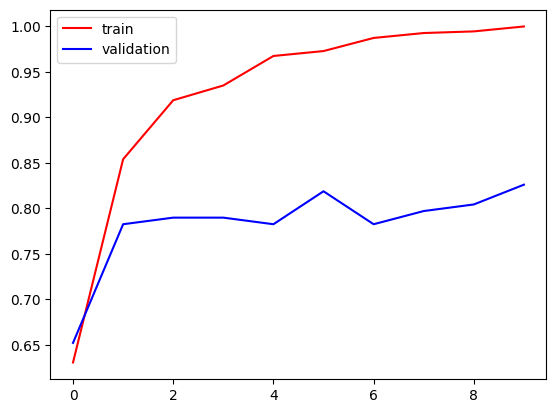

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

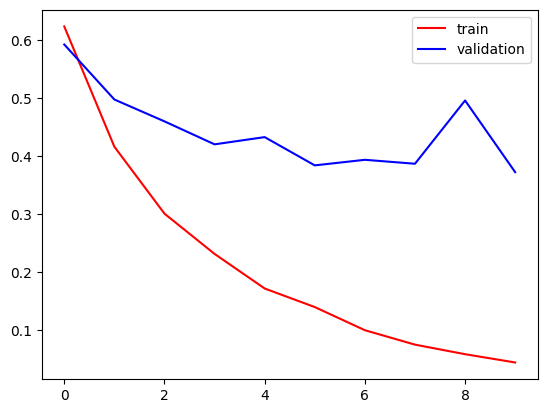

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()